<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install -q yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy
import yfinance as yf

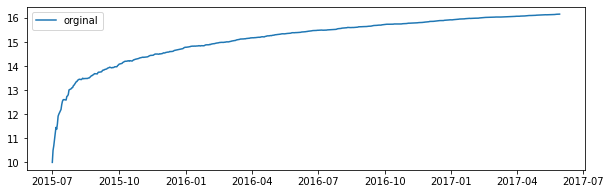

In [26]:
N = 500
scalar = 10
t = pd.date_range('2015-07-01', periods=N, freq=BDay())
x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar

x = pd.Series(x, index=t)

plt.figure(figsize=(10,3))
plt.plot(t,x, label='orginal')
plt.legend()
plt.show()

# Zad 1
Wersja biblioteczna

In [27]:
x.describe()

count    500.000000
mean      15.137578
std        0.977133
min       10.001247
25%       14.691840
50%       15.433876
75%       15.860315
max       16.160310
dtype: float64

# Zad 2

In [28]:
E = x.apply(lambda x : entropy(N, base=2)).reset_index()


def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

  

for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(x, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

<ipython-input-28-d3b2e12d98f9>:13: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)
<ipython-input-28-d3b2e12d98f9>:13: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


Hurst exponent with 20 lags: nan
Hurst exponent with 100 lags: nan


<ipython-input-28-d3b2e12d98f9>:13: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


Hurst exponent with 300 lags: nan


<ipython-input-28-d3b2e12d98f9>:13: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


Hurst exponent with 500 lags: nan
Hurst exponent with 1000 lags: nan


<ipython-input-28-d3b2e12d98f9>:13: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


In [30]:
spy_df = yf.download("^GSPC", 
                     start="2010-01-01", 
                     end="2019-12-31", 
                     progress=False)


sample_size = 1000
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(spy_df["Adj Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.5 MB/s eta 0:00:00
Hurst exponent with 20 lags: 0.4394
Hurst exponent with 100 lags: 0.3834
Hurst exponent with 300 lags: 0.3257
Hurst exponent with 500 lags: 0.3230
Hurst exponent with 1000 lags: 0.1793


# Zad 3


# Zad 4